<a href="https://colab.research.google.com/github/my9oso6gqm/my9oso6gqm.github.io/blob/main/varie/temp/trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Recupero dati da Binance

In [3]:
!pip install binance-connector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 1.9 MB/s 
     |████████████████████████████████| 3.1 MB 10.1 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 396 kB 68.1 MB/s 
     |████████████████████████████████| 4.0 MB 37.3 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 251 kB 52.2 MB/s 
  Created wheel for autobahn: filename=autobahn-22.4.2-cp37-cp37m-linux_x86_64.whl size=580330 sha256=17188c0126fddd0cfefed3b501ab9a1289f2741654b56a696b56763176760d4b
  Stored in directory: /root/.cache/pip/wheels/ec/0b/fc/7cf072cb66e08c9365e03420a6447aa45da6f70dd4b08b223c
Successfully built autobahn
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstal

In [4]:
from binance.spot import Spot as Client
import pandas as pd

In [5]:
## Recupero dalle Api di Binance i dati di Cardano
spot_client = Client(base_url="https://api.binance.com")
data = spot_client.klines("ADAUSDT", "1m", limit=1000)

In [6]:
## Converto la risposta delle Api in un Dataframe di Pandas
df = pd.DataFrame(data)

In [7]:
## Stampo il Dataframe
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1653963720000,0.58770000,0.58900000,0.58680000,0.58680000,199454.70000000,1653963779999,117283.84369000,509,77696.90000000,45697.41852000,0
1,1653963780000,0.58680000,0.58700000,0.58570000,0.58590000,260718.70000000,1653963839999,152884.37926000,271,44678.70000000,26201.46940000,0
2,1653963840000,0.58600000,0.58880000,0.58600000,0.58770000,179775.30000000,1653963899999,105652.62684000,246,134048.60000000,78764.75325000,0
3,1653963900000,0.58760000,0.58830000,0.58760000,0.58830000,58864.60000000,1653963959999,34615.46985000,90,39337.90000000,23133.15971000,0
4,1653963960000,0.58840000,0.58880000,0.58770000,0.58820000,180973.30000000,1653964019999,106419.17232000,214,123267.10000000,72487.54614000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1654023420000,0.60000000,0.60190000,0.60000000,0.60080000,404005.90000000,1654023479999,242890.83450000,575,225008.60000000,135274.19034000,0
996,1654023480000,0.60080000,0.60220000,0.60040000,0.60210000,374584.50000000,1654023539999,225182.69494000,545,207998.90000000,125053.43588000,0
997,1654023540000,0.60210000,0.60240000,0.60060000,0.60170000,297688.50000000,1654023599999,179062.33617000,418,131280.50000000,78975.45199000,0
998,1654023600000,0.60170000,0.60200000,0.59950000,0.60000000,429595.60000000,1654023659999,258073.49232000,486,248127.10000000,149018.46439000,0


In [8]:
## Converto il Timestamp in Datatime
df[0] = (pd.to_datetime(df[0],unit='ms'))

In [9]:
## Elimino le colonne che non uso
df = df.drop(columns=[6, 7, 8, 9, 10, 11])

In [10]:
## Do dei nomi alle colonne
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']

In [11]:
## Grafico chiusure di Cardano

In [12]:
import matplotlib.pyplot as plt

In [13]:
## Converto il formato della colonna Close
df["close"] = df["close"].astype(float)

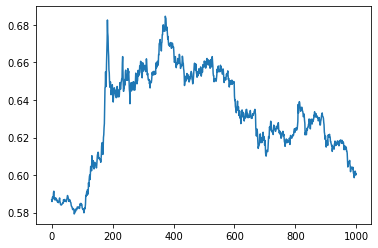

In [14]:
## Grafico la colonna Close
df["close"].plot()

In [15]:
## SMA

$$SMA = \frac{\sum_{i=1}^{N}Pi}{N}$$

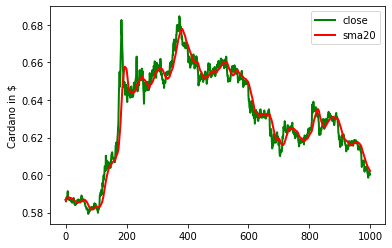

In [16]:
import statistics as stats
import matplotlib.pyplot as plt

time_period = 20
history = []
sma_values = []

for close_price in df["close"]:
  history.append(close_price)
  if len(history) > time_period:
    del (history[0])

  sma_values.append(stats.mean(history))

df = df.assign(sma20=pd.Series(sma_values))

close_price = df['close']

sma = df['sma20']

import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Cardano in $')

close_price.plot(ax=ax1, color='g', lw=2., legend=True)

sma.plot(ax=ax1, color='r', lw=2., legend=True)

plt.show()

In [17]:
## Doppia SMA

In [21]:
import numpy as np

In [27]:
cardano_data = df

In [30]:
def double_moving_average(financial_data, short_window, long_window):
    signals = pd.DataFrame(index=financial_data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = financial_data['close'].rolling(window=short_window,min_periods=1, center=False).mean()
    signals['long_mavg'] = financial_data['close'].rolling(window=long_window,min_periods=1, center=False).mean()
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['orders'] = signals['signal'].diff()
    return signals

ts=double_moving_average(cardano_data,20,50)
ts

,signal,short_mavg,long_mavg,orders
0,0.0,0.586800,0.586800,NaN
1,0.0,0.586350,0.586350,0.0
2,0.0,0.586800,0.586800,0.0
3,0.0,0.587175,0.587175,0.0
4,0.0,0.587380,0.587380,0.0
...,...,...,...,...
995,0.0,0.603355,0.609944,0.0
996,0.0,0.603105,0.609622,0.0
997,0.0,0.602855,0.609286,0.0
998,0.0,0.602465,0.608912,0.0


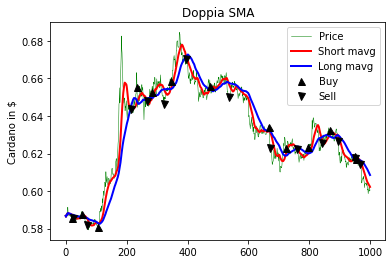

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Cardano in $')
cardano_data["close"].plot(ax=ax1, color='g', lw=.5)
ts["short_mavg"].plot(ax=ax1, color='r', lw=2.)
ts["long_mavg"].plot(ax=ax1, color='b', lw=2.)
ax1.plot(ts.loc[ts.orders== 1.0].index,
    cardano_data["close"][ts.orders == 1.0],
    '^', markersize=7, color='k')
ax1.plot(ts.loc[ts.orders== -1.0].index,
    cardano_data["close"][ts.orders == -1.0],
    'v', markersize=7, color='k')
plt.legend(["Price","Short mavg","Long mavg","Buy","Sell"])
plt.title("Doppia SMA")
plt.show()